In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [122]:
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 192

In [123]:
data = pd.read_csv('snipe_data.csv')
labels = data['label'].values.astype(np.int64)
data = data.drop('label', axis=1).values.astype(np.uint8)
data = data.reshape(-1, IMAGE_HEIGHT, IMAGE_WIDTH, 3)

# switch BGR to RGB
# theres probs a built-in function for doing this, this is so slow, but it works
img_data = np.zeros((len(data), IMAGE_HEIGHT, IMAGE_WIDTH, 3), dtype=np.uint8)
for i in range (len(data)):
    for y in range(IMAGE_HEIGHT):
        for x in range(IMAGE_WIDTH):
            img_data[i][y][x][0] = data[i][y][x][2]
            img_data[i][y][x][1] = data[i][y][x][1]
            img_data[i][y][x][2] = data[i][y][x][0]

In [124]:
# Define function that plots multiple images in an array of images
def PlotImages(ix_start,num_img,rows,cols,images,labels,label_names,color=True):
    plt.figure(figsize=(10,10))
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    for i in range(num_img):
        plt.subplot(rows,cols,i+1)
        plt.axis('off')
        plt.imshow(images[ix_start+i])
        plt.title(label_names[labels[ix_start+i]])

In [125]:
# Create image label names
label_names = pd.read_csv('labels.csv',header=None)
label_names = label_names.values.flatten()
label_names = label_names.flatten()
label_names

array(['Abigail', 'Allyn', 'Anna', 'Ben', 'Emily', 'Evelyn', 'Garrett',
       'Jacob', 'Katie', 'Kiana', 'Lillian', 'Mike', 'Natasa', 'Nathan',
       'Nikki', 'Reilly', 'Spencer', 'Steph', 'Zoe'], dtype=object)

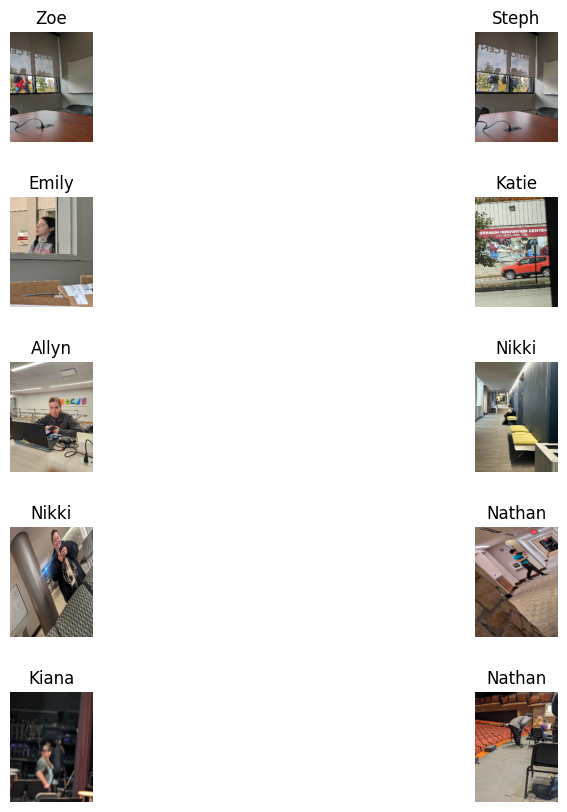

In [126]:
PlotImages(0,100,10,10, img_data,labels,label_names)